# Final Report

## Title:

#### Analysis of whether living in the urban or rural areas affected children's academic performance

## Introduction:

A constant concern of every parent is their child's performance in terms of grades. How parents’ wealth and resources can shape a child’s achievement academically has been extensively researched by sociologists (Yurk Quadlin 2015). Many parents use their resources to strategically influence children’s educational performance (Bernardi & Grätz 2015). How neighborhood characteristics are significantly associated with children's educational outcomes has also been documented by many pieces of quantitative research (Nieuwenhuis & Hooimeijer 2016). Thus, in this report, we will be discovering and determining whether there are statistically significant differences between the academic performance of the children living in urban areas and those living in rural areas.

In this report, we will be working on a dataset named “Go To College Dataset” from Kaggle, which is about whether or not students will continue to go to college based on each student’s background information. The information for each student includes `type_school` the type of school that the student attended during high school, `school_accreditation` the quality of the school, `gender` the gender of the student, `interest` how interested the student is in going to college, `residence` whether they lived in an urban or rural area, `parent_age` age of the student's parents, `parent_salary` the student's parents' salary per month, `house_area` the student's house area in meter square, `average_grades` the student's average of grades in a scale of 0-100, `parent_was_in_college` whether the student's parents were ever in college. In this report, we will be focusing particularly on two columns: `residence` (whether the students lived in an urban or rural area) and `average_grades` (their average grades). 

Using the programming language R as a tool for our analysis, we will be attempting to answer the research question: <br> **Do students living in urban areas perform significantly better in terms of grades than students living in rural areas?**


## Methods and Results:

In [29]:
# run the initial package
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)
library(stats)
library(dplyr)
options(repr.matrix.max.rows = 6)
library("ggplot2")
library("GGally")

In [30]:
# Load dataset
download.file("https://raw.githubusercontent.com/Zhangcheng0410/stat201/main/data.csv", destfile="data.csv")

studentset_original <- read_csv("data.csv")

studentset_original

Rows: 1000 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): type_school, school_accreditation, gender, interest, residence
dbl (4): parent_age, parent_salary, house_area, average_grades
lgl (2): parent_was_in_college, will_go_to_college

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,FALSE,TRUE
Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,FALSE,TRUE
Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,FALSE,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,FALSE,TRUE
Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,TRUE,TRUE
Academic,B,Male,Interested,Urban,50,2940000,69.1,86.13,TRUE,FALSE


#### Wrangling Data

In [31]:
# drop the null column in data
studentset <- studentset_original %>%
    filter(!is.na(residence))%>%
    filter(!is.na(average_grades))

Checked whether the data contained missing data. After filtering out the NA the data now does not contain null values.

#### Preliminary Analysis

In [32]:
# compare the distribution of urban and rural
urban_prop <- studentset%>%
    summarize(prop_urban= mean(residence=="Urban"), prop_rural= mean(residence=="Rural"))
urban_prop
    

prop_urban,prop_rural
<dbl>,<dbl>
0.539,0.461


With the `summarize()` function above, we can see that the distribution of students living in an urban area and a rural area are roughly even, so class imbalance does not exist and the data is representative enough. 

In [33]:
# calculate the mean and median of average grades from unban student
student_urban <- studentset%>%
    filter(residence=="Urban")%>%
    select(residence, average_grades)
urban_mean_median <- student_urban%>%
    summarize(mean= mean(average_grades), median=median(average_grades))
head(student_urban)
urban_mean_median 

residence,average_grades
<chr>,<dbl>
Urban,84.09
Urban,86.91
Urban,87.43
Urban,86.79
Urban,84.09
Urban,89.71


mean,median
<dbl>,<dbl>
85.41506,85.09


The mean of students from urban is 85.41506, and the median is 85.09.

In [34]:
# calculate the mean and median of average grades from rural student
student_rural <- studentset %>%
    filter(residence=="Rural") %>%
    select(residence, average_grades)
rural_mean_median <- student_rural %>%
    summarize(mean= mean(average_grades), median=median(average_grades))
head(student_rural)
rural_mean_median  

residence,average_grades
<chr>,<dbl>
Rural,82.12
Rural,86.79
Rural,90.39
Rural,84.65
Rural,88.50
Rural,85.43


mean,median
<dbl>,<dbl>
86.89475,86.33


#### Plotting Data

The mean of students from rural is 86.89475, and the median is 86.33.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


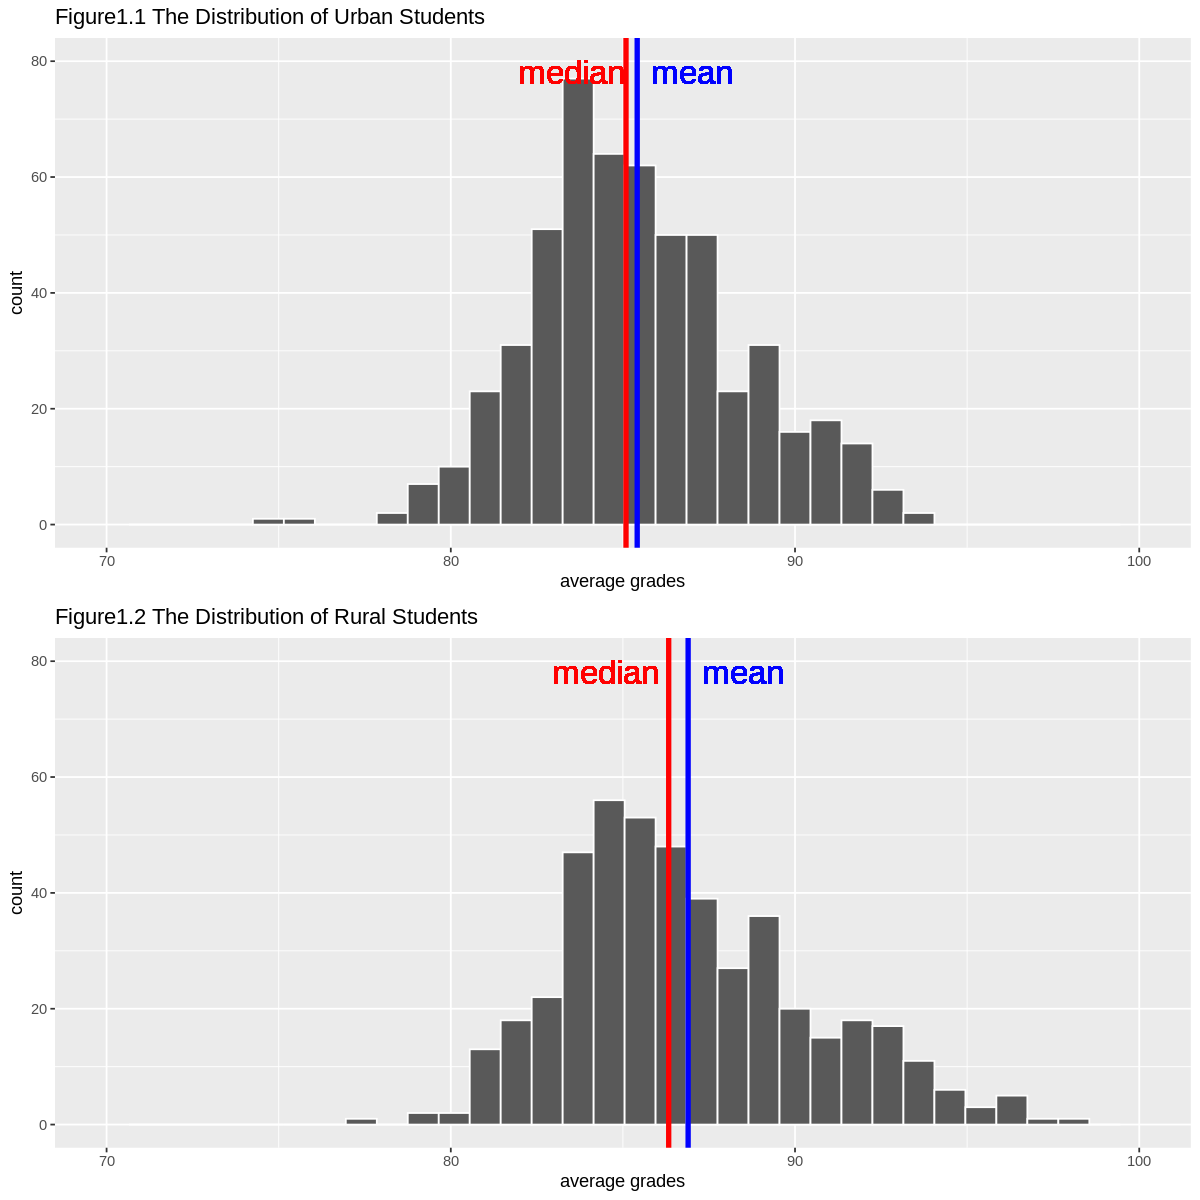

In [71]:
# visualize each median and mean from urban and rural dataset
options(repr.plot.width = 10, repr.plot.height = 10)
urban_plot <- student_urban %>%
    ggplot(aes(x= average_grades))+
    geom_histogram(binwidth=0.9, color="white")+
    labs(title="Figure1.1 The Distribution of Urban Students", x="average grades", y="count")+
    geom_vline(xintercept = urban_mean_median$mean,
                color = "blue", size=1.5)+
    geom_text(aes(x=87, y= 80, label = "mean"), colour = "blue", vjust = 1, size = 7)+ 
    geom_vline(xintercept = urban_mean_median$median, 
                color = "red", size=1.5)+
    geom_text(aes(x=83.5, y= 80, label = "median"), colour = "red", vjust = 1, size = 7)

rural_plot <- student_rural %>%
    ggplot(aes(x= average_grades))+
    geom_histogram(binwidth=0.9, color="white")+
    labs(title="Figure1.2 The Distribution of Rural Students", x="average grades",y="count")+
    geom_vline(xintercept = rural_mean_median$mean,
                color = "blue", size=1.5)+
    geom_text(aes(x=88.5, y= 80, label = "mean"), colour = "blue", vjust = 1, size = 7)+ 
    geom_vline(xintercept = rural_mean_median$median, 
                color = "red", size=1.5)+
    geom_text(aes(x=84.5, y= 80, label = "median"), colour = "red", vjust = 1, size = 7)

proportion_plot_row <- plot_grid(urban_plot +
                                 scale_x_continuous(limits = c(70, 100)),
                                 rural_plot +
                                 scale_x_continuous(limits = c(70, 100)),
                                 ncol = 1)
means_grid <- plot_grid(proportion_plot_row)
                        # ncol = 1,
                        # rel_heights = c(1, 10))

# urban_plot
# rural_plot
means_grid

We can compare the distribution of the two groups of students from the above histograms. Students living in urban areas have both a slightly lower median and a slightly lower mean compared to those living in rural areas.

In [36]:
# select two useful columns: students' residence and average score 
student_total<- studentset%>%
    select(residence, average_grades)

student_total

residence,average_grades
<chr>,<dbl>
Urban,84.09
Urban,86.91
Urban,87.43
⋮,⋮
Urban,79.56
Rural,87.18
Urban,86.13


#### Hypothesis Testing

We want to test whether the`residence` (whether the students lived in an urban or rural area) column statistical significantly influences the students' `average_grades`. We guess students living in rural areas have better academic performance than those living in urban areas.

For the purpose of our study, the median and mean values of `average_grades` with students from urban and rural areas separated into two groups, `student_urban` and `student_rural`, would be most suitable to investigate and ultimately test the our claim. 

We want to study how the `average_grades` of students from urban and rural areas are statistically different. For now, let us focus on the mean of the average grades. We want to test hypotheses on the mean at the 5% significance level. 

First, let's conduct a hypothesis test to examine whether the means of the students' `average_grades` are statistical significantly different between the urban group and the rural group. <br>
Our two hypotheses is as follow:

$H_0$: The mean of students' score from rural is same as the mean of students' score from urban.

$H_1$: The mean of students' score from rural is larger than the mean of students' score from urban.

In [37]:
# first calculate the observed test statistic
obs_diff_in_means <- 
    student_total%>%
    specify(formula=average_grades~residence)%>%
    calculate(stat= "diff in means", order= c("Rural", "Urban"))
obs_diff_in_means

stat
<dbl>
1.479686


The test statistic value is 1.479686.

#### Plan

We want to compare the mean of the `average_grades` between the students living in urban areas and rural areas by repeatedly doing bootstrap sampling on the original sample, generating a confidence interval for the mean of `average_grades`, and then verifying whether our null hypothesis that the `average_grades` are the same for both groups of students is true.

#### Finding the p-value

In [67]:
set.seed(123)
# Using the infer package, generate 1000 samples from the null distribution
null_model_students_mean <-  
   studentset %>%
   specify(formula = average_grades ~ residence) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("Rural", "Urban"))

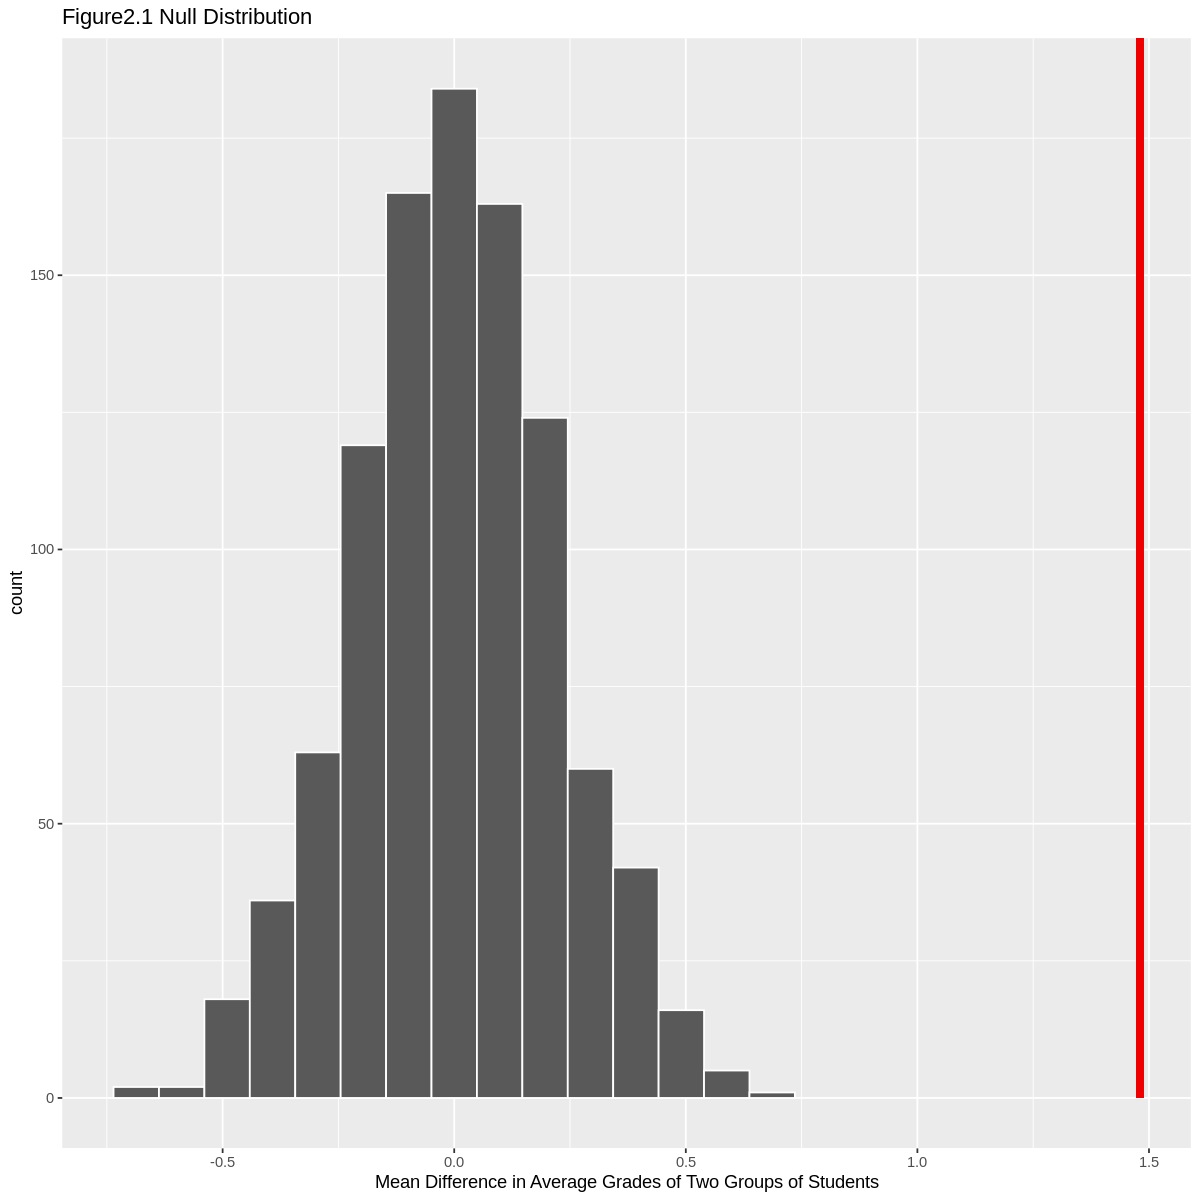

In [72]:
#Plot the result of the hypothesis test with `visualize` with 10 bins, put a vertical bar for the observed test 
result_plot_students <- 
   null_model_students_mean %>%
   visualize() + 
   shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
   labs(x = "Mean Difference in Average Grades of Two Groups of Students")+
   ggtitle("Figure2.1 Null Distribution")

result_plot_students

In [73]:
p_value_mean_students <- 
    null_model_students_mean %>% 
    get_p_value(obs_stat = obs_diff_in_means, direction = "right") %>%
    pull()

cat("P value is: ", p_value_mean_students)

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


P value is:  0

With this p-value test above, we can see that p-value computed is 0. However, we should never report a p-value of 0 because this suggests that making a Type I error is impossible. Therefore, we can conduct that real p-value is a number very close to 0 but not equal to 0.

In [74]:
set.seed(123)
# find the bootstrap distribution for the difference in means in 1000 samples with the infer package
interval_students_mean <-  
   studentset %>%
   specify(formula = average_grades ~ residence) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "bootstrap") %>% 
   calculate(stat="diff in means", order = c("Rural", "Urban"))

# find the 95% confidence interval
mean_max_flow_ci <- 
    interval_students_mean%>% 
    get_confidence_interval(level = 0.975, type = "percentile")

mean_max_flow_ci

Warning message:
“You have given `type = "bootstrap"`, but `type` is expected to be `"permute"`. This workflow is untested and the results may not mean what you think they mean.”


lower_ci,upper_ci
<dbl>,<dbl>
1.042089,1.926108


The 95% confidence interval of mean difference is from 1.03402 to 1.959269.


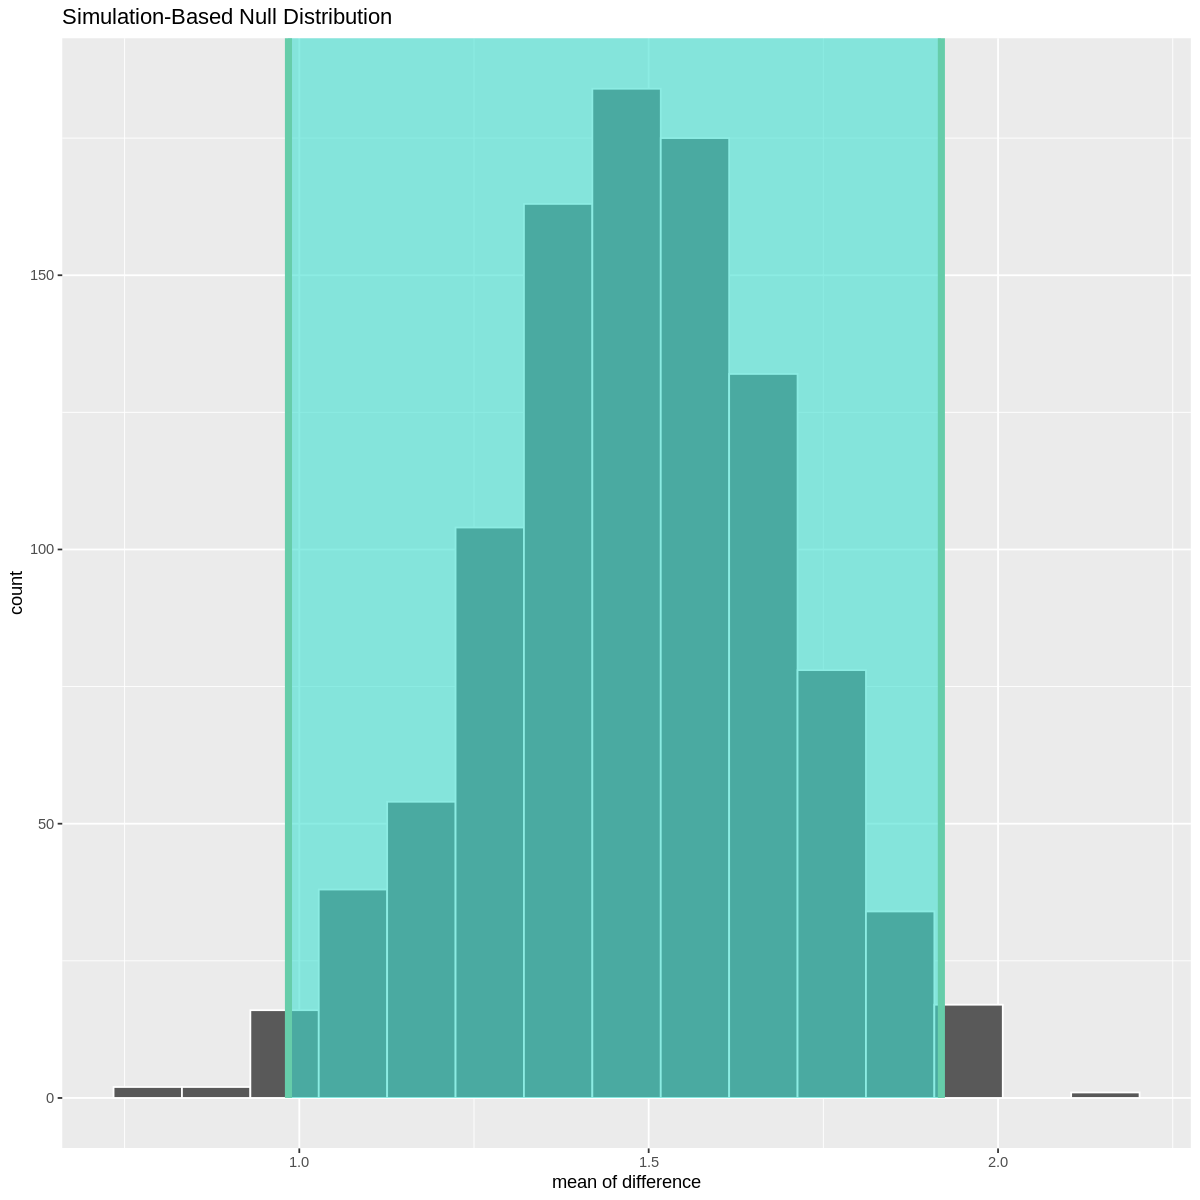

In [63]:
diff_in_means_ci_plot <- visualize(interval_students_mean) + 
    shade_confidence_interval(endpoints = mean_max_flow_ci)+
    xlab("mean of difference")+
    ggtitle("Figure2.2 Bootstra")

diff_in_means_ci_plot

By visulizing 95% confidence interval and computing the p-value (nearly to 0) which is less than significance level 0.05, we should reject the null hypothesis which the mean of students' score from rural is same as the mean of students' score from urban, and accpet H1 hypothesis which the mean of students' score from rural is larger than the mean of students' score from urban.

## Discussion

Although we know the observed test statistic (difference in means of students' grades from urban and rural areas), we can't make conclusions on our hypothesis as we do not have enough evidence to rejection or retain the null hypothesis. To do this, we will simulate from the null distribution. Using the infer package, generate 1000 samples from the null distribution. And then use student_total to specify the response and explanatory variables, hypothesize, generate 1000 samples and calculate rural students' grades mean minus urban students' grades mean. After that, we will plot the result of the hypothesis test with visualize, obtain the p-value and analyze it, since we set the 5% significance level, so we compare the p-value to the 5% significance level. If p-value is less than 5% significance level, then we will reject $H_0$. The make conclusion baesd on the result of the hypothesis test. Finally, we would like to find the 90% confidence interval for the difference in mean. We choose 90% confidence level since the wider the confidence interval, the more intervals can capture the true mean. Also, since it's just a data about the difference between rural and urban students' behavior, not the data like the cancer, so we don't need 99% confidence interval, which is pretty precise. We will also plot the bootstrap distribution. 

**What do you expect to find?**

We expect to find that we will reject $H_0$.

**What impact could such findings have?**

The findings could provide parents a new perspective on the influence of school locations on students' academic performance. Many people often make the assumption that urban schools are more developed and is equipped with better academic cirrciulum. Whilst it may be true, the findings from this experiment could show that there are influences other than location, which has a greater impact on students' academic performances. 

**What future questions could this lead to?**

By finding whether students in urban or rural areas have better academic achievement, this could lead us to investigate factors that lead to such findings. For instance, what causes the students in rural areas to have a better behavior than students in urban areas? 

## References:

Mukti, S. (2022). Go To College Dataset. https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset


Bernardi, F., & Gratz, M. (2015). Making up for an unlucky month of birth in school: Causal evidence on the compensatory advantage of family background in england. _Sociological Science_, 2(12), 235-251. https://doi.org/10.15195/v2.a12


Nieuwenhuis, J., & Hooimeijer, P. (2016). The association between neighbourhoods and educational achievement, a systematic review and meta-analysis. _Journal of housing and the built environment : HBE_, 31(2), 321–347. https://doi.org/10.1007/s10901-015-9460-7


Yurk Quadlin, N. (2015). When children affect parents: Children’s academic performance and parental investment. _Social Science Research_, 52, 671-685. https://doi.org/10.1016/j.ssresearch.2014.10.007
